In [189]:
import os
import warnings
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sankeyflow import Sankey
from fuzzywuzzy import process

tqdm.pandas()
warnings.filterwarnings("ignore")

In [190]:
students_path = "./major_minor/students.csv"

In [191]:
df = pd.read_csv(students_path)
df

,batch,email,id,name,status,major,minor,program,grad,cgpa,mgpa
0,ASP 2017-18,aania_asp18@ashoka.edu.in,UG-14-1609,Aania,Graduated,NaN,NaN,ASP,2018.0,2.64,0.0
1,ASP 2017-18,aashna.lal_asp18@ashoka.edu.in,UG-14-0568,Aashna Lal,Graduated,NaN,CW,ASP,2018.0,3.36,0.0
2,ASP 2017-18,abhinav.srikant_asp18@ashoka.edu.in,UG-14-1833,Abhinav Srikant,Graduated,PSY,MS,ASP,2018.0,3.14,0.0
3,ASP 2017-18,aditya.prakash_asp18@ashoka.edu.in,UG-14-1812,Aditya Prakash,Graduated,NaN,MAT,ASP,2018.0,3.57,0.0
4,ASP 2017-18,ahan.bezbaroa_asp18@ashoka.edu.in,UG-14-0336,Ahan Bezbaroa,Graduated,PPE,ENG,ASP,2018.0,3.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7001,UG 2023-27,yuvakshi.dam_ug2023@ashoka.edu.in,1020231747,Yuvakshi Dam,Enrolled,NaN,NaN,UG,2027.0,3.22,0.0
7002,UG 2023-27,yuvraj.verma_ug2023@ashoka.edu.in,1020231748,Yuvraj Verma,Enrolled,NaN,NaN,UG,2027.0,3.19,0.0
7003,UG 2023-27,zahra.baqeri_ug2023@ashoka.edu.in,1020231020,Zahra Baqeri,Enrolled,NaN,NaN,UG,2027.0,0.00,0.0
7004,UG 2023-27,zahrah.imani_ug2023@ashoka.edu.in,1020231749,Zahrah Salim Imani,Enrolled,NaN,NaN,UG,2027.0,3.82,0.0


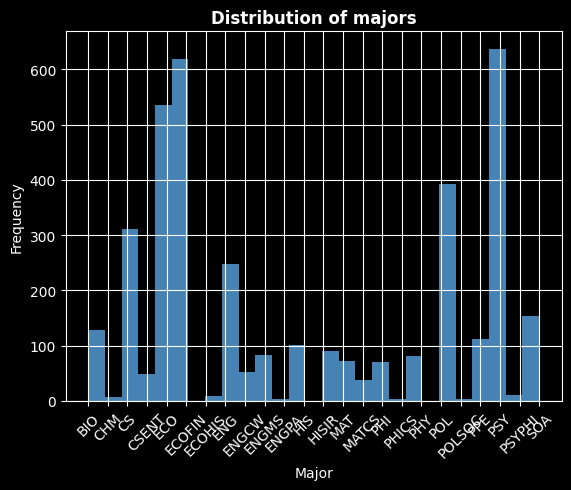

In [192]:
df = df.sort_values(by=['major'])
df = df[df["status"] != "Early Exit"].reset_index(drop=True)

ax = df[df["program"] == "UG"]["major"].hist(bins=df["major"].nunique(), color="steelblue")
ax.set_title('Distribution of majors', weight='bold')
ax.set_xlabel('Major')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

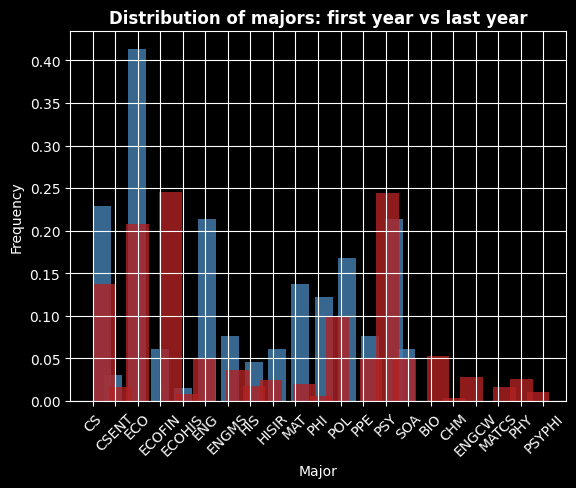

In [193]:
df = df.sort_values(by=["grad", "major"])

ax = df[df["batch"] == "UG 2014-17"]["major"].hist(bins=df["major"].nunique(), width=0.8, color="steelblue", density=True, alpha=0.8)
ax2 = df[df["batch"] == "UG 2021-24"]["major"].hist(bins=df["major"].nunique(), width=1, color="firebrick", density=True, alpha=0.8)
ax.set_title('Distribution of majors: first year vs last year', weight='bold')
ax.set_xlabel('Major')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

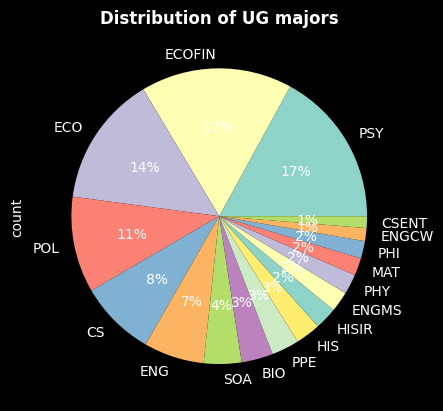

In [194]:
ax = df[df["program"] == "UG"]["major"].value_counts().iloc[:17].plot.pie(autopct='%1.0f%%')
ax.set_title('Distribution of UG majors', weight='bold')
plt.show()

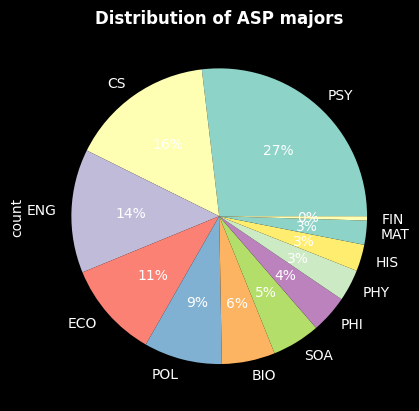

In [195]:
ax = df[df["program"] == "ASP"]["major"].value_counts().iloc[:12].plot.pie(autopct='%1.0f%%')
ax.set_title('Distribution of ASP majors', weight='bold')
plt.show()

In [196]:
ugs = df[df["program"] == "UG"]
asps = df[df["program"] == "ASP"]

asps["ug_grad"] = asps["grad"] - 1
asps["major"] = asps["major"] + " "
asps["minor"] = asps["minor"].apply(lambda x: x.replace(",", " ,") if (not pd.isna(x) and type(x) == str and "," in x) else x + " " if not pd.isna(x) else None)

In [197]:
people = pd.merge(ugs, asps, how="left", left_on=["name", "grad"], right_on=["name", "ug_grad"], suffixes=("_ug", "_asp"))
people["subject_asp"] = people.apply(lambda x: x["minor_asp"].split(",")[0] if (not pd.isna(x["minor_asp"]) and type(x["minor_asp"]) == str and "," in x["minor_asp"]) else x["minor_asp"] if not pd.isna(x["minor_asp"]) else x["major_asp"] if not pd.isna(x["major_asp"]) else None, axis=1)
people["major_asp"] = people.apply(lambda x: x["major_asp"] if not pd.isna(x["major_asp"]) else x["minor_asp"].split(",")[0] if (not pd.isna(x["minor_asp"]) and type(x["minor_asp"]) == str and "," in x["minor_asp"]) else x["minor_asp"] if not pd.isna(x["minor_asp"]) else None, axis=1)

people = people[~people["subject_asp"].isnull()]
# people = people[people["batch_ug"] == "UG 2021-24"]
people

,batch_ug,email_ug,id_ug,name,status_ug,major_ug,minor_ug,program_ug,grad_ug,cgpa_ug,...,id_asp,status_asp,major_asp,minor_asp,program_asp,grad_asp,cgpa_asp,mgpa_asp,ug_grad,subject_asp
1,UG 2014-17,shreyash.krishna@ashoka.edu.in,UG-14-2508,Shreyash Krishna,Graduated,CS,NaN,UG,2017.0,3.24,...,UG-14-2508,Graduated,CS,None,ASP,2018.0,3.73,0.0,2017.0,CS
3,UG 2014-17,vivek.madala@ashoka.edu.in,UG-14-1920,Deva Surya Vivek Madala,Graduated,CS,ECO,UG,2017.0,3.55,...,UG-14-1920,Graduated,CS,None,ASP,2018.0,3.55,0.0,2017.0,CS
4,UG 2014-17,yash.joshi@ashoka.edu.in,UG-14-2145,Yash Joshi,Graduated,CS,NaN,UG,2017.0,3.35,...,UG-14-2145,Graduated,CS,None,ASP,2018.0,3.35,0.0,2017.0,CS
5,UG 2014-17,shivangi.tikekar@ashoka.edu.in,UG-14-0166,Shivangi Tikekar,Graduated,CS,NaN,UG,2017.0,3.28,...,UG-14-0166,Graduated,CS,MS,ASP,2018.0,3.28,0.0,2017.0,MS
6,UG 2014-17,apuroop.sethupathy@ashoka.edu.in,UG-14-2469,Apuroop Sethupathy,Graduated,CS,ECO,UG,2017.0,3.06,...,UG-14-2469,Graduated,CS,None,ASP,2018.0,3.06,0.0,2017.0,CS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,UG 2021-24,ishan.shanavas_ug24@ashoka.edu.in,1020211183,Ishan Shanavas,Graduated,SOA,ES,UG,2024.0,3.75,...,1020211183,Enrolled,ENT,"ENT ,VA",ASP,2025.0,0.00,0.0,2024.0,ENT
3253,UG 2021-24,areeb.mansoor_ug24@ashoka.edu.in,1020211219,Areeb Mansoor,Graduated,SOA,HIS,UG,2024.0,3.58,...,1020211219,Enrolled,SOA,None,ASP,2025.0,0.00,0.0,2024.0,SOA
3254,UG 2021-24,arayna.dasgupta_ug24@ashoka.edu.in,1020211155,Arayna Dasgupta,Graduated,SOA,POL,UG,2024.0,3.66,...,1020211155,Enrolled,POL,None,ASP,2025.0,0.00,0.0,2024.0,POL
3256,UG 2021-24,aysha.joyce_ug24@ashoka.edu.in,1020211752,Aysha Joyce,Graduated,SOA,NaN,UG,2024.0,3.71,...,1020211752,Enrolled,SOA,ENG,ASP,2025.0,0.00,0.0,2024.0,ENG


In [198]:
level1 = sorted([(key, value) for key, value in people["major_ug"].value_counts().items()], key=lambda x: x[1], reverse=True)[:16]
level2 = sorted([(key, value) for key, value in people["subject_asp"].value_counts().items()], key=lambda x: x[1], reverse=True)[:22]
flows = list((people[["major_ug", "subject_asp"]].value_counts()).reset_index().apply(lambda x: (x["major_ug"], x["subject_asp"], x["count"]), axis=1))[:70]

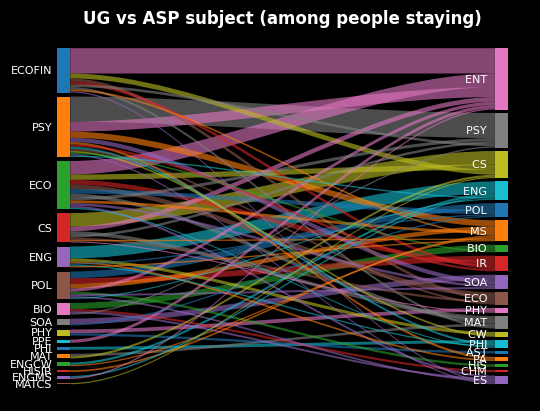

In [199]:
s = Sankey(flows=flows,
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("UG vs ASP subject (among people staying)", weight="bold")
s.draw()

In [200]:
level1 = sorted([(key, value) for key, value in people["major_ug"].value_counts().items()], key=lambda x: x[1],
                reverse=True)
level2 = sorted([(key, value) for key, value in people["major_asp"].value_counts().items()], key=lambda x: x[1],
                reverse=True)
flows = list((people[["major_ug", "major_asp"]].value_counts()).reset_index().apply(
    lambda x: (x["major_ug"], x["major_asp"], x["count"]), axis=1))

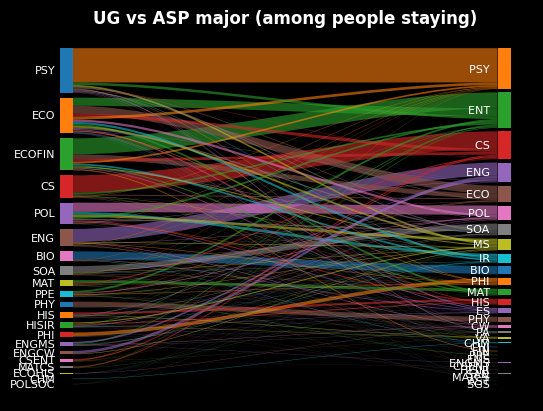

In [201]:
s = Sankey(flows=flows, nodes=[level1, level2],
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("UG vs ASP major (among people staying)", weight="bold")
s.draw()

In [202]:
plt.style.use('dark_background')

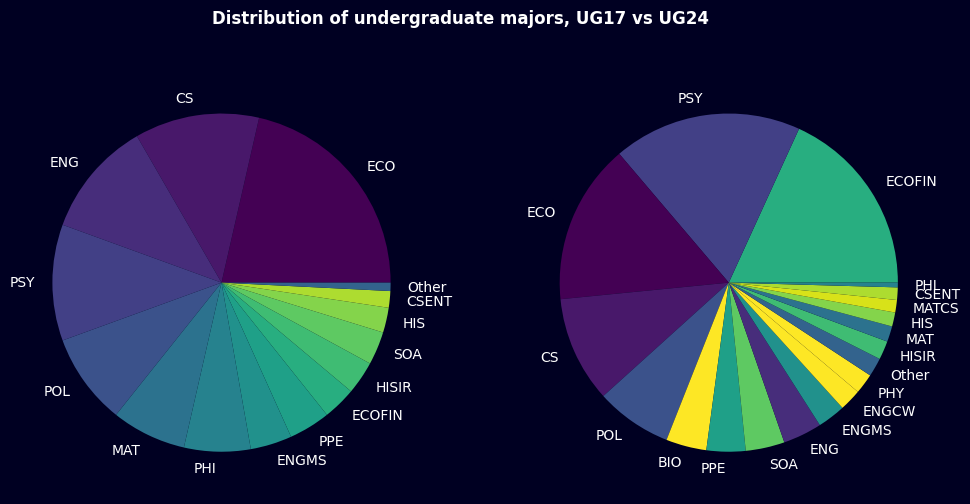

In [203]:
ug17 = df[(df["batch"] == "UG 2014-17") | (df["batch"] == "UG 2014-17")]
ug24 = df[(df["batch"] == "UG 2021-24") | (df["batch"] == "UG 2021-24")]
majors = ['PSY', 'ECOFIN', 'ECO', 'CS', 'POL', 'BIO', 'SOA', 'ENG', 'PPE', 'ENGMS', 'ENGCW', 'PHY', 'MAT', 'HISIR', 'PHI', 'HIS', 'CSENT', 'MATCS']

ug17["major"] = ug17["major"].apply(lambda x: x if x in majors else "Other")
ug24["major"] = ug24["major"].apply(lambda x: x if x in majors else "Other")
ug17values = ug17["major"].value_counts()
ug24values = ug24["major"].value_counts()

majorcolors = {label: color  for label, color in zip(['ECO', 'CS', 'ENG', 'PSY', 'POL', 'Other', 'MAT', 'PHI', 'ENGMS', 'PPE', 'ECOFIN', 'HISIR', 'SOA', 'HIS','CSENT',  'MATCS', 'BIO', 'ENGCW', 'PHY'], (plt.get_cmap('viridis')(i / 16) for i in range(20)))}

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), facecolor="#000022")
fig.suptitle("Distribution of undergraduate majors, UG17 vs UG24", weight="bold", x=0.5, y=0.95)
ug17values.plot.pie(ax=axes[0], fontsize=10, colors=[majorcolors[v] for v in ug17["major"].value_counts().keys()])
ug24values.plot.pie(ax=axes[1], fontsize=10, colors=[majorcolors[v] for v in ug24["major"].value_counts().keys()])
axes[0].set_axis_off()
axes[1].set_axis_off()

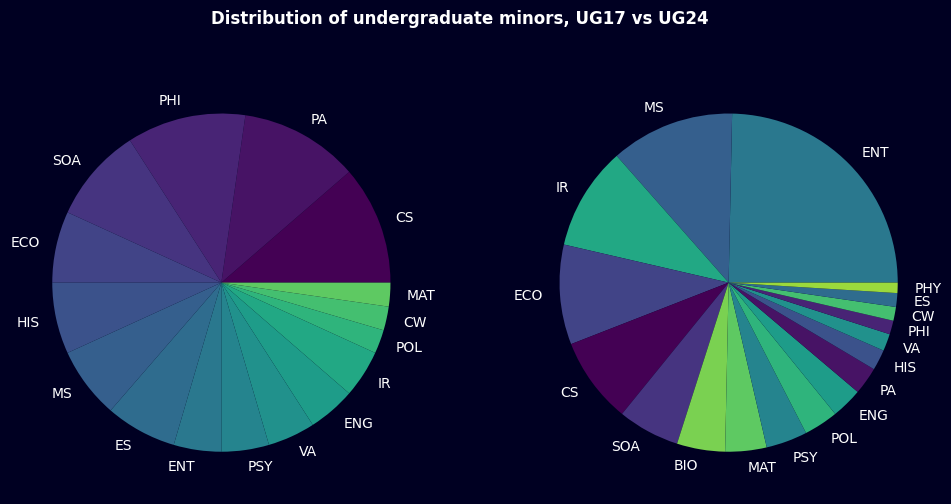

In [204]:
minors = ['PSY', 'ECO', 'FIN', 'CS', 'POL', 'BIO', 'SOA', 'ENG', 'MS', 'CW', 'PHY', 'MAT', 'IR', 'PHI', 'HIS', 'ENT', 'VA', 'PA', 'ES']

ug17["minor"] = ug17["minor"].apply(lambda x: x if x in minors else "None")
ug24["minor"] = ug24["minor"].apply(lambda x: x if x in minors else "None")
ug17values = ug17[ug17["minor"] != "None"]["minor"].value_counts()
ug24values = ug24[ug24["minor"] != "None"]["minor"].value_counts()

minorcolors = {label: color  for label, color in zip(['CS', 'PA', 'PHI', 'SOA', 'ECO', 'HIS', 'MS', 'ES', 'ENT', 'PSY', 'VA', 'ENG', 'IR', 'POL', 'CW', 'MAT', 'BIO', 'PHY', 'None'], (plt.get_cmap('viridis')(i / 20) for i in range(20)))}

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), facecolor="#000022")
fig.suptitle("Distribution of undergraduate minors, UG17 vs UG24", weight="bold", x=0.5, y=0.95)
ug17values.plot.pie(ax=axes[0], fontsize=10, colors=[minorcolors[v] for v in ug17values.keys()])
ug24values.plot.pie(ax=axes[1], fontsize=10, colors=[minorcolors[v] for v in ug24values.keys()])
axes[0].set_axis_off()
axes[1].set_axis_off()

In [205]:
print(f'Share of ECO/ECOFIN/PSY majors in 2017: {len(ug17[ug17["major"].isin(["ECOFIN", "ECO", "PSY"])])/len(ug17)*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2024: {len(ug24[ug24["major"].isin(["ECOFIN", "ECO", "PSY"])])/len(ug24)*100}')

Share of ECO/ECOFIN/PSY majors in 2017: 35.714285714285715
Share of ECO/ECOFIN/PSY majors in 2024: 51.56482861400894


In [206]:
print(f'Number of Economics majors in 2017: {len(ug17[ug17["major"].isin(["ECOFIN", "ECO"])])}')
print(f'Number of Economics majors in 2024: {len(ug24[ug24["major"].isin(["ECOFIN", "ECO"])])}')

Number of Economics majors in 2017: 31
Number of Economics majors in 2024: 225


In [207]:
print(f'Share of English majors in 2017: {len(ug17[ug17["major"].isin(["ENG", "ENGMS", "ENGCW"])])/len(ug17)*100}')
print(f'Share of English majors in 2024: {len(ug24[ug24["major"].isin(["ENG", "ENGMS", "ENGCW"])])/len(ug24)*100}')

Share of English majors in 2017: 15.079365079365079
Share of English majors in 2024: 8.49478390461997


In [208]:
print(f'Number of English majors in 2017: {len(ug17[ug17["major"].isin(["ENG", "ENGMS", "ENGCW"])])}')
print(f'Number of English majors in 2024: {len(ug24[ug24["major"].isin(["ENG", "ENGMS", "ENGCW"])])}')

Number of English majors in 2017: 19
Number of English majors in 2024: 57


In [209]:
asp17 = df[df["batch"] == "ASP 2017-18"]
asp25 = df[df["batch"] == "ASP 2024-25"]
print(f'Share of ENT minors in 2017: {len(ug17[ug17["minor"].isin(["ENT"])])/len(ug17)*100}')
print(f'Share of ENT minors in 2024: {len(ug24[ug24["minor"].isin(["ENT"])])/len(ug24)*100}')

Share of ENT minors in 2017: 1.5873015873015872
Share of ENT minors in 2024: 11.177347242921014


In [210]:
print(f'Number of ENT minors in 2017: {len(ug17[ug17["minor"].isin(["ENT"])])}')
print(f'Number of ENT minors in 2024: {len(ug24[ug24["minor"].isin(["ENT"])])}')

Number of ENT minors in 2017: 2
Number of ENT minors in 2024: 75


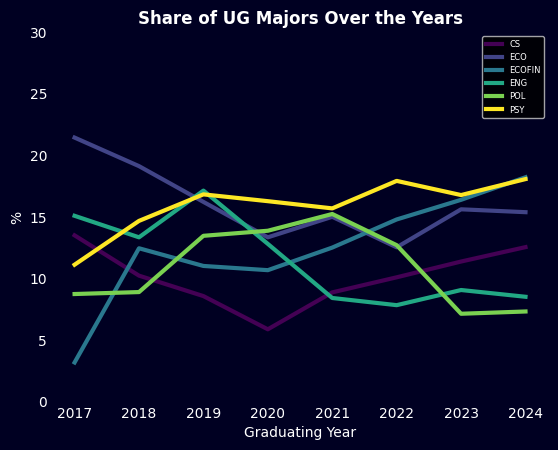

In [211]:
df["major"] = df["major"].apply(lambda x: "CS" if x in ["CS", "MATCS", "CSENT"] else "ENG" if x in ["ENG", "ENGCW", "ENGMS"] else x)
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[category_counts["major"].isin(list(df["major"].value_counts().reset_index()["major"].iloc[:6]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of UG Majors Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_ylim(0, 30)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

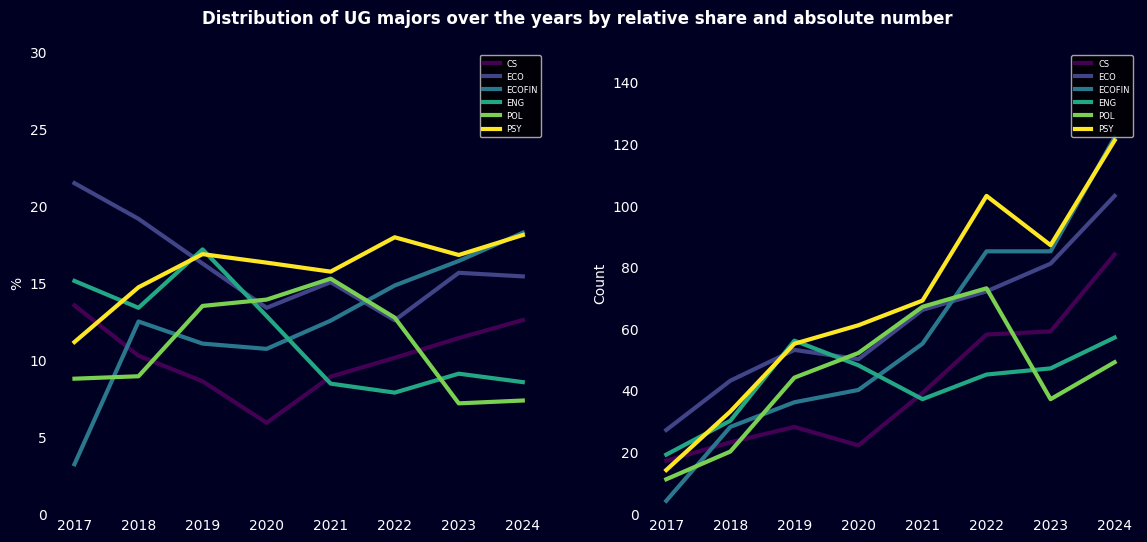

In [212]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[category_counts["major"].isin(list(df["major"].value_counts().reset_index()["major"].iloc[:6]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df_count = category_counts.pivot(index='grad', columns='major', values='count').fillna(0)
pivot_df_share = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Distribution of UG majors over the years by relative share and absolute number", weight="bold", x=0.5, y=0.95, fontsize=12)

pivot_df_share.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])

axes[0].set_ylim(0, 30)
axes[0].set_ylabel("%", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

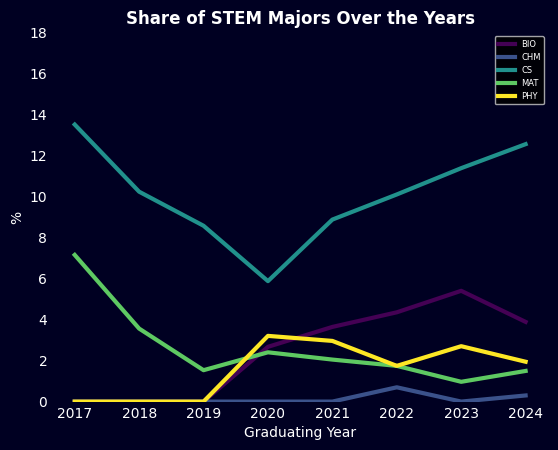

In [213]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[(category_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of STEM Majors Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_ylim(0, 18)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

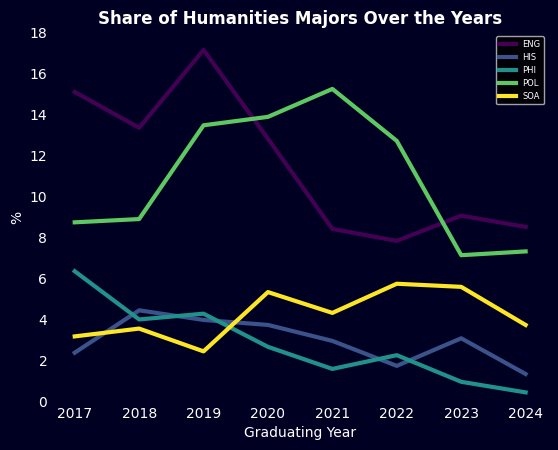

In [214]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[(category_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of Humanities Majors Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_ylim(0, 18)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

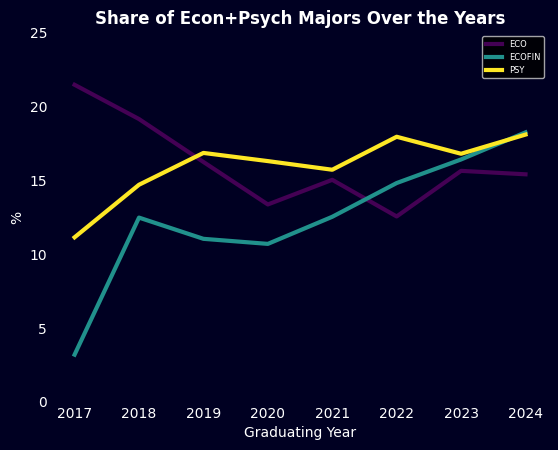

In [215]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[(category_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of Econ+Psych Majors Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_ylim(0, 25)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

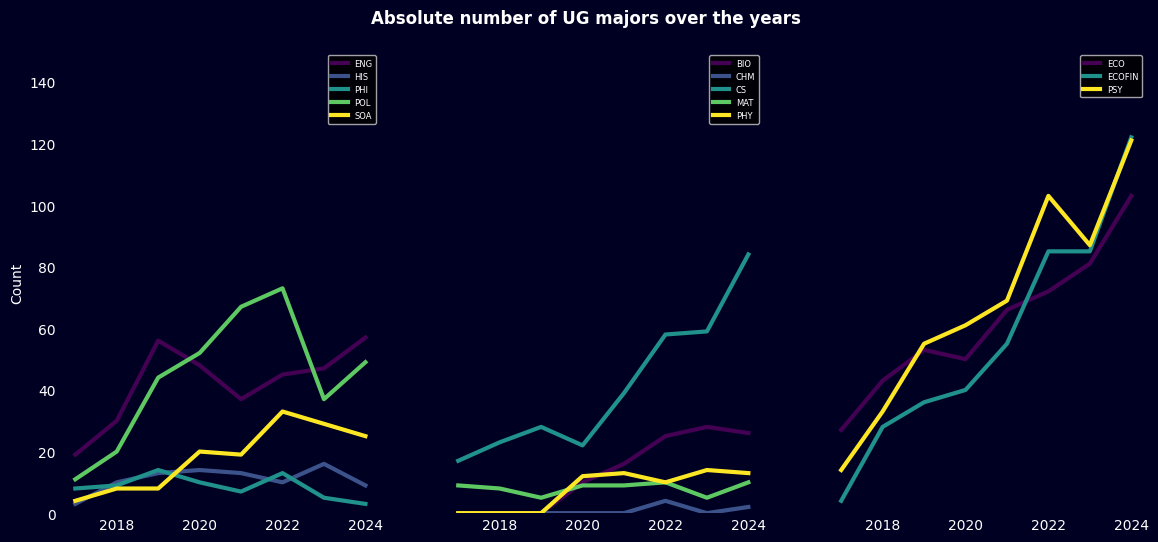

In [217]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100

core_counts = category_counts[(category_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]
hum_counts = category_counts[(category_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]
stem_counts = category_counts[(category_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

core_pivot_df_count = core_counts.pivot(index='grad', columns='major', values='count').fillna(0)
hum_pivot_df_count = hum_counts.pivot(index='grad', columns='major', values='count').fillna(0)
stem_pivot_df_count = stem_counts.pivot(index='grad', columns='major', values='count').fillna(0)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Absolute number of UG majors over the years", weight="bold", x=0.5, y=0.95, fontsize=12)

hum_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
stem_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])
core_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[2])

axes[0].set_ylim(0, 150)
axes[0].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

In [218]:
def fuzzy_merge(df_1, df_name, key1, key2, threshold=90, limit=3):

    column = df_name[key2].tolist()

    matches = df_1[key1].apply(lambda x: process.extract(x, column, limit=limit))
    df_1['matches'] = matches

    m2 = df_1['matches'].apply(lambda x: ', '.join([str(i[0]) for i in x if i[1] >= threshold]).split(",")[0])
    m2 = m2.apply(lambda x: x if x != "nan" else "")
    df_1['matches'] = m2

    def get_probability(x):
        if x in df_name[key2].values:
            return df_name.loc[df_name[key2] == x, "Male Probability"].values[0]
        return None

    df_1['probability'] = df_1['matches'].apply(get_probability)

    return df_1

In [219]:
# name_gender = pd.read_csv("./gender/indian_first_names.csv").drop(["Index", "Count"], axis=1)
# name_gender["Name"] = name_gender["Name"].apply(lambda x: x.capitalize())
# df["first_name"] = df["name"].apply(lambda x: x.split(" ")[0])
# gender_df = fuzzy_merge(df, name_gender, 'first_name', 'Name', threshold=60)
# gender_df["gender"] = gender_df["probability"].apply(lambda x: "male" if x > 0.8 else "female")
# gender_df.to_csv("./gender_students.csv")
gender_df = pd.read_csv("./gender/gender_df.csv", index_col=0)
gender_df

,batch,email,id,name,status,major,minor,program,grad,cgpa,mgpa,gender,first_name,matches,probability
321,UG 2014-17,shivangi.tikekar@ashoka.edu.in,UG-14-0166,Shivangi Tikekar,Graduated,CS,NaN,UG,2017,3.28,3.28,female,Shivangi,Shivangi,0.0
415,UG 2014-17,samridh.kudesia@ashoka.edu.in,UG-14-1375,Samridh Kudesia,Graduated,CS,POL,UG,2017,3.16,3.08,female,Samridh,Samridhi,0.0
727,UG 2014-17,mihika.sood@ashoka.edu.in,UG-14-1617,Mihika Sood,Graduated,CS,ENT,UG,2017,2.74,2.43,female,Mihika,Ishika,0.0
907,UG 2014-17,krathika.parchani@ashoka.edu.in,UG-14-0063,Krathika Parchani,Graduated,ECO,NaN,UG,2017,3.63,3.64,female,Krathika,Kratika,0.0
969,UG 2014-17,smera.dania@ashoka.edu.in,UG-14-3381,Smera Dania,Graduated,ECO,NaN,UG,2017,3.10,3.04,female,Smera,Era,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,UG 2023-27,vivaan.majumder_ug2023@ashoka.edu.in,1020231735,Vivaan Majumder,Enrolled,NaN,NaN,UG,2027,3.44,0.00,male,Vivaan,Vivian,1.0
6674,UG 2023-27,yashwanth.bommareddy_ug2023@ashoka.edu.in,1020231745,Yashwanth Vema Reddy Bommareddy,Enrolled,NaN,NaN,UG,2027,3.50,0.00,male,Yashwanth,Yashwanth,1.0
6677,UG 2023-27,yuvraj.verma_ug2023@ashoka.edu.in,1020231748,Yuvraj Verma,Enrolled,NaN,NaN,UG,2027,3.19,0.00,male,Yuvraj,Yuvraj,1.0
6678,UG 2023-27,zahra.baqeri_ug2023@ashoka.edu.in,1020231020,Zahra Baqeri,Enrolled,NaN,NaN,UG,2027,0.00,0.00,male,Zahra,Abhra,1.0


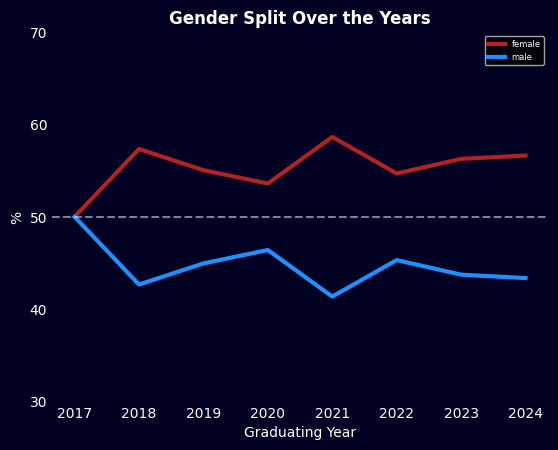

In [220]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG")].groupby(['grad', 'gender']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby('grad')['count'].sum().reset_index()
gender_counts = gender_counts[gender_counts["gender"].isin(["male", "female"])]

gender_counts = gender_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
pivot_df = gender_counts.pivot(index='grad', columns='gender', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, color=["firebrick", "dodgerblue"])
plt.title('Gender Split Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(30, 70)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

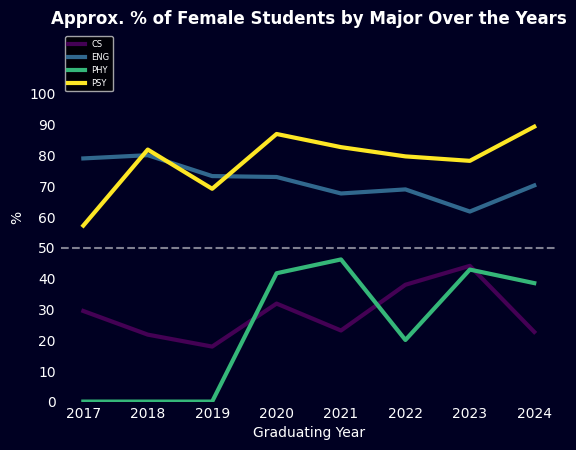

In [221]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby(['grad', 'major'])['count'].sum().reset_index()
gender_counts = gender_counts[(gender_counts["gender"].isin(["male", "female"])) & (gender_counts["major"].isin(["PHY", "PSY", "CS", "ENG"]))]

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "female"]

pivot_df = gender_counts.pivot(index='grad', columns=['major'], values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Approx. % of Female Students by Major Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(0, 120)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper left")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

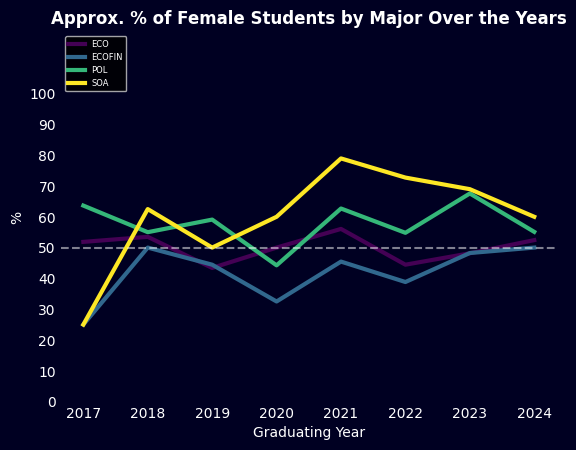

In [226]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby(['grad', 'major'])['count'].sum().reset_index()
gender_counts = gender_counts[(gender_counts["gender"].isin(["male", "female"])) & (gender_counts["major"].isin(["POL", "ECO", "ECOFIN", "SOA"]))]

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "female"]

pivot_df = gender_counts.pivot(index='grad', columns=['major'], values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Approx. % of Female Students by Major Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(0, 120)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper left")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

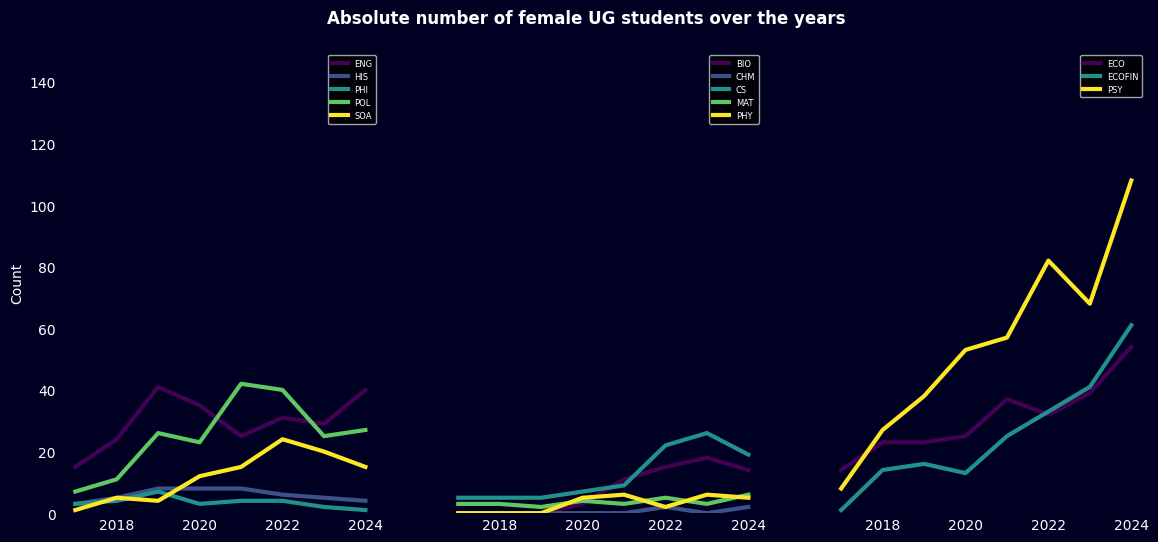

In [222]:
gender_counts = gender_df[(gender_df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby(['grad', 'major'])['count'].sum().reset_index()

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "female"]

core_counts = gender_counts[(gender_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]
hum_counts = gender_counts[(gender_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]
stem_counts = gender_counts[(gender_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

core_pivot_df_count = core_counts.pivot(index='grad', columns='major', values='count').fillna(0)
hum_pivot_df_count = hum_counts.pivot(index='grad', columns='major', values='count').fillna(0)
stem_pivot_df_count = stem_counts.pivot(index='grad', columns='major', values='count').fillna(0)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Absolute number of female UG students over the years", weight="bold", x=0.5, y=0.95, fontsize=12)

hum_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
stem_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])
core_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[2])

axes[0].set_ylim(0, 150)
axes[0].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

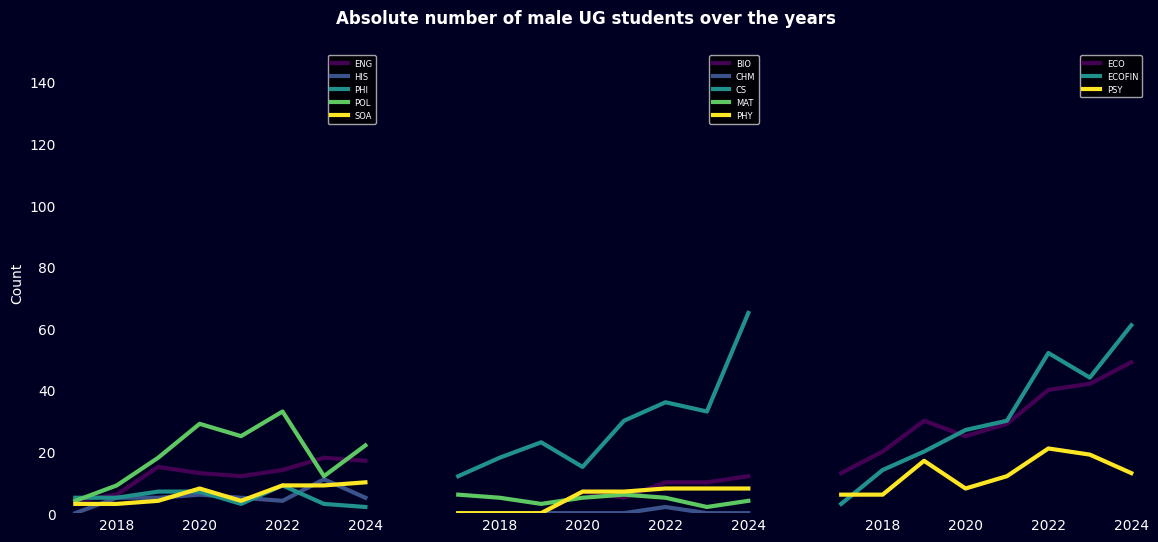

In [223]:
gender_counts = gender_df[(gender_df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby(['grad', 'major'])['count'].sum().reset_index()

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "male"]

core_counts = gender_counts[(gender_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]
hum_counts = gender_counts[(gender_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]
stem_counts = gender_counts[(gender_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

core_pivot_df_count = core_counts.pivot(index='grad', columns='major', values='count').fillna(0)
hum_pivot_df_count = hum_counts.pivot(index='grad', columns='major', values='count').fillna(0)
stem_pivot_df_count = stem_counts.pivot(index='grad', columns='major', values='count').fillna(0)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Absolute number of male UG students over the years", weight="bold", x=0.5, y=0.95, fontsize=12)

hum_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
stem_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])
core_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[2])

axes[0].set_ylim(0, 150)
axes[0].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

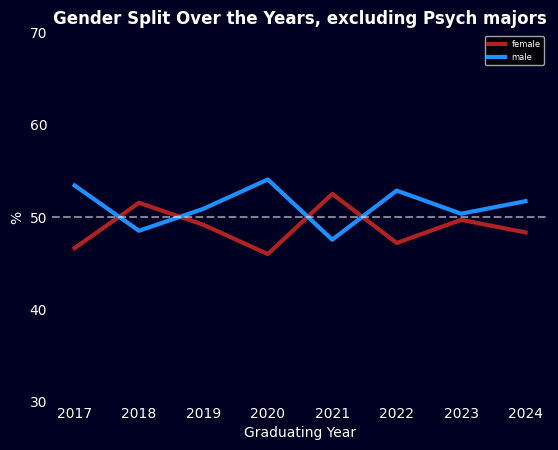

In [224]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG") & ~((gender_df["major"] == "PSY") & (gender_df["gender"] == "female"))].groupby(['grad', 'gender']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby('grad')['count'].sum().reset_index()
gender_counts = gender_counts[gender_counts["gender"].isin(["male", "female"])]

gender_counts = gender_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
pivot_df = gender_counts.pivot(index='grad', columns='gender', values='percentage')

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, color=["firebrick", "dodgerblue"])
plt.title('Gender Split Over the Years, excluding Psych majors', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(30, 70)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()